# Extrapolation

We have a dataset of noisy points and want to extrapolate from these. Therefore we write a quick function `extrapolation(data_x, data_y, x)` which takes the x and y values of the datapoints as well as the x where we want to extrapolate at. We use the `linear_model` from `sklearn`.

In [13]:
from sklearn import linear_model
import matplotlib.pyplot as plt
from randify import randify, RandomVariable, plot_pdf
import numpy as np

@randify(verbose=True)
def extrapolation(data_x, data_y, x):
    data_x = np.array(data_x).reshape(-1, 1)
    x = np.array([[x]])
    reg = linear_model.LinearRegression()
    reg.fit(data_x, data_y)
    return reg.predict(x)[0]

Now we want to analyze how sensitive our extrapolation is to our noisy data. For that we define `data_y` as RandomVariable where every value y consists of a linear part with a slope m and a added Gaussian noise. Note how you can use the lambda expression to write a nice generator function to define the RandomVariable. After performing the simulation with randify we can evulate the distribution of the extrapolated value y.

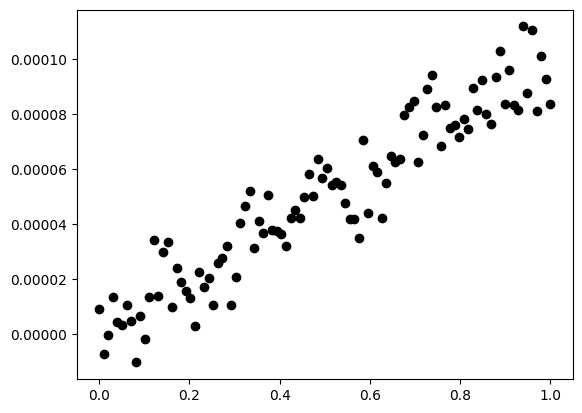

In [19]:
N = 100
m = 1e9 # true slope of the linear model
data_x = np.linspace(0, 1, N)
noise = 1e8

x_eval = 2

data_y = RandomVariable(lambda: data_x * m + np.random.normal(loc=0, scale=noise, size=(N,)))

data_y_one_realization = data_y.sample()

# plot example data points
plt.scatter(data_x, data_y_one_realization, color='black', label='data points')

Randify: 1089 samples evaluated in 0.651s.
Expected value of extrapolation: E[y] = 0.0002001249892503003. True value is 0.0002.
Standard deviation of extrapolation: sigma = 5.351790670341602e-06


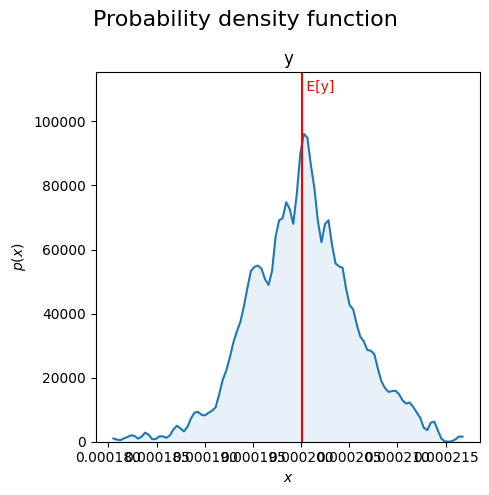

In [20]:
y = extrapolation(data_x, data_y, x=x_eval)

print(f"Expected value of extrapolation: E[y] = {y.expected_value}. True value is {x_eval * m}.")
print(f"Standard deviation of extrapolation: sigma = {np.sqrt(y.variance)}")
plot_pdf(y=y)

We see that also the value of y is roughly normally distributed. You can play around with the number of samples N and the noise parameter to see how the standard deviation of y changes.